#**1장**

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


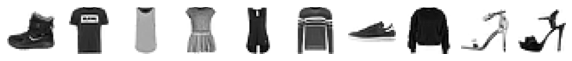

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')

plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter = 5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_sclaed, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [ ]:
model = keras.Sequential(dense)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 5s 2ms/step - loss: 0.7701 - accuracy: 0.7432
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4870 - accuracy: 0.8378
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4645 - accuracy: 0.8444
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4432 - accuracy: 0.8519
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4316 - accuracy: 0.8571
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4355 - accuracy: 0.8569
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4285 - accuracy: 0.8576
Epoch 8/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4209 - accuracy: 0.8618
Epoch 9/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4204 - accuracy: 0.8619
Epoch 10/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.416

In [ ]:
model.evaluate(val_sclaed, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4464 - accuracy: 0.8518


[0.4464039206504822, 0.8518333435058594]

In [ ]:
print(train_scaled.shape)

(48000, 784)


#**2장**

In [2]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()


In [3]:
print(train_input.shape)
print(train_target.shape)

(60000, 28, 28)
(60000,)


In [4]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [6]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [7]:
model = keras.Sequential([dense1, dense2])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
model = keras.Sequential(
    [
     keras.layers.Dense(100,activation='sigmoid',input_shape=(784,), name='hidden'),
     keras.layers.Dense(10, activation='softmax', name='output')
    ]
)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

In [33]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

In [25]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6701 - accuracy: 0.7657
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4006 - accuracy: 0.8549
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3597 - accuracy: 0.8705
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3336 - accuracy: 0.8813
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3210 - accuracy: 0.8860


In [26]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3554 - accuracy: 0.8793


[0.3553711771965027, 0.8793333172798157]

In [27]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics='accuracy')

In [29]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [30]:
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy', metrics='accuracy')

In [31]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2884 - accuracy: 0.8948
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2755 - accuracy: 0.9006
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2565 - accuracy: 0.9080
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2479 - accuracy: 0.9085
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2476 - accuracy: 0.9083


In [32]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3321 - accuracy: 0.8832


[0.332130491733551, 0.8832499980926514]

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6704 - accuracy: 0.7650
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3991 - accuracy: 0.8576
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3551 - accuracy: 0.8719
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3268 - accuracy: 0.8807
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3012 - accuracy: 0.8895


#**3장**

In [40]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [41]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [42]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [49]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [52]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


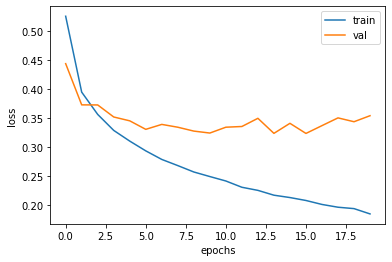

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

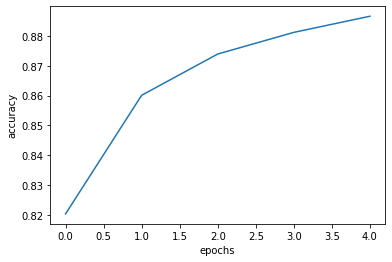

In [47]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [53]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


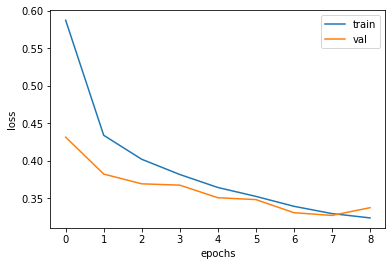

In [58]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=9, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [59]:
model.save_weights('model-weights.h5')

In [60]:
model.save('model-whole.h5')

In [61]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 May  6 08:13 model-weights.h5
-rw-r--r-- 1 root root 981776 May  6 08:13 model-whole.h5


In [62]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [64]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels == val_target))

0.8776666666666667


In [65]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3374 - accuracy: 0.8777


[0.3374059796333313, 0.8776666522026062]

In [66]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=5, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])


In [68]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3608 - accuracy: 0.8675


[0.36084872484207153, 0.8675000071525574]

In [70]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

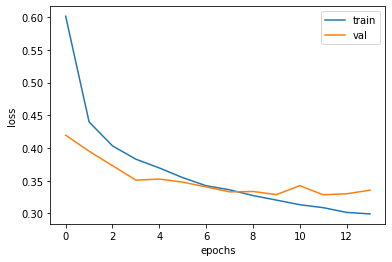

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [72]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3286 - accuracy: 0.8813


[0.3286035358905792, 0.8813333511352539]